## **Feynn Labs - Machine Learning Internship**

### **Task - Analysing various Geographical and Demographic factors regarding Health Insurance Claim Fraud**

**Importing Libraries and loading the dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
df = pd.read_csv('/content/Insurance Dataset.csv')

**Exploratory Data Analysis & Visualization**

In [ ]:
df.head()

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,...,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,...,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,...,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


In [ ]:
df.shape

(1048575, 24)

In [ ]:
df.columns

Index(['Area_Service', 'Hospital County', 'Hospital Id', 'Age', 'Gender',
       'Cultural_group', 'ethnicity', 'Days_spend_hsptl', 'Admission_type',
       'Home or self care,', 'ccs_diagnosis_code', 'ccs_procedure_code',
       'apr_drg_description', 'Code_illness', 'Mortality risk',
       'Surg_Description', 'Weight_baby', 'Abortion', 'Emergency dept_yes/No',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Result', 'Payment_Typology'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1046119 non-null  object 
 1   Hospital County                        1046119 non-null  object 
 2   Hospital Id                            1046119 non-null  float64
 3   Age                                    1048575 non-null  object 
 4   Gender                                 1048575 non-null  object 
 5   Cultural_group                         1048575 non-null  object 
 6   ethnicity                              1048575 non-null  object 
 7   Days_spend_hsptl                       1048575 non-null  object 
 8   Admission_type                         1048575 non-null  object 
 9   Home or self care,                     1048575 non-null  object 
 10  ccs_diagnosis_code                     104

In [ ]:
# Removing spaces from the columns
df.columns = df.columns.to_series().apply(lambda x: x.replace(' ','_')).to_list()
df.columns = df.columns.to_series().apply(lambda x: x.replace('/','_')).to_list()
df.head()

,Area_Service,Hospital_County,Hospital_Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home_or_self_care,",...,Mortality_risk,Surg_Description,Weight_baby,Abortion,Emergency_dept_yes_No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,...,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,...,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,...,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,...,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


In [ ]:
# Dropping duplicates and null values
df.drop_duplicates(inplace=True)
df.dropna(inplace = True)
df.shape

(1041265, 24)

In [ ]:
df.isnull().sum()

Area_Service                             0
Hospital_County                          0
Hospital_Id                              0
Age                                      0
Gender                                   0
Cultural_group                           0
ethnicity                                0
Days_spend_hsptl                         0
Admission_type                           0
Home_or_self_care,                       0
ccs_diagnosis_code                       0
ccs_procedure_code                       0
apr_drg_description                      0
Code_illness                             0
Mortality_risk                           0
Surg_Description                         0
Weight_baby                              0
Abortion                                 0
Emergency_dept_yes_No                    0
Tot_charg                                0
Tot_cost                                 0
ratio_of_total_costs_to_total_charges    0
Result                                   0
Payment_Typ

In [ ]:
# We are not considering the columns having Gender - 'U'
df = df[df['Gender']!= 'U']
df['Gender'].value_counts()

F    588585
M    452653
Name: Gender, dtype: int64

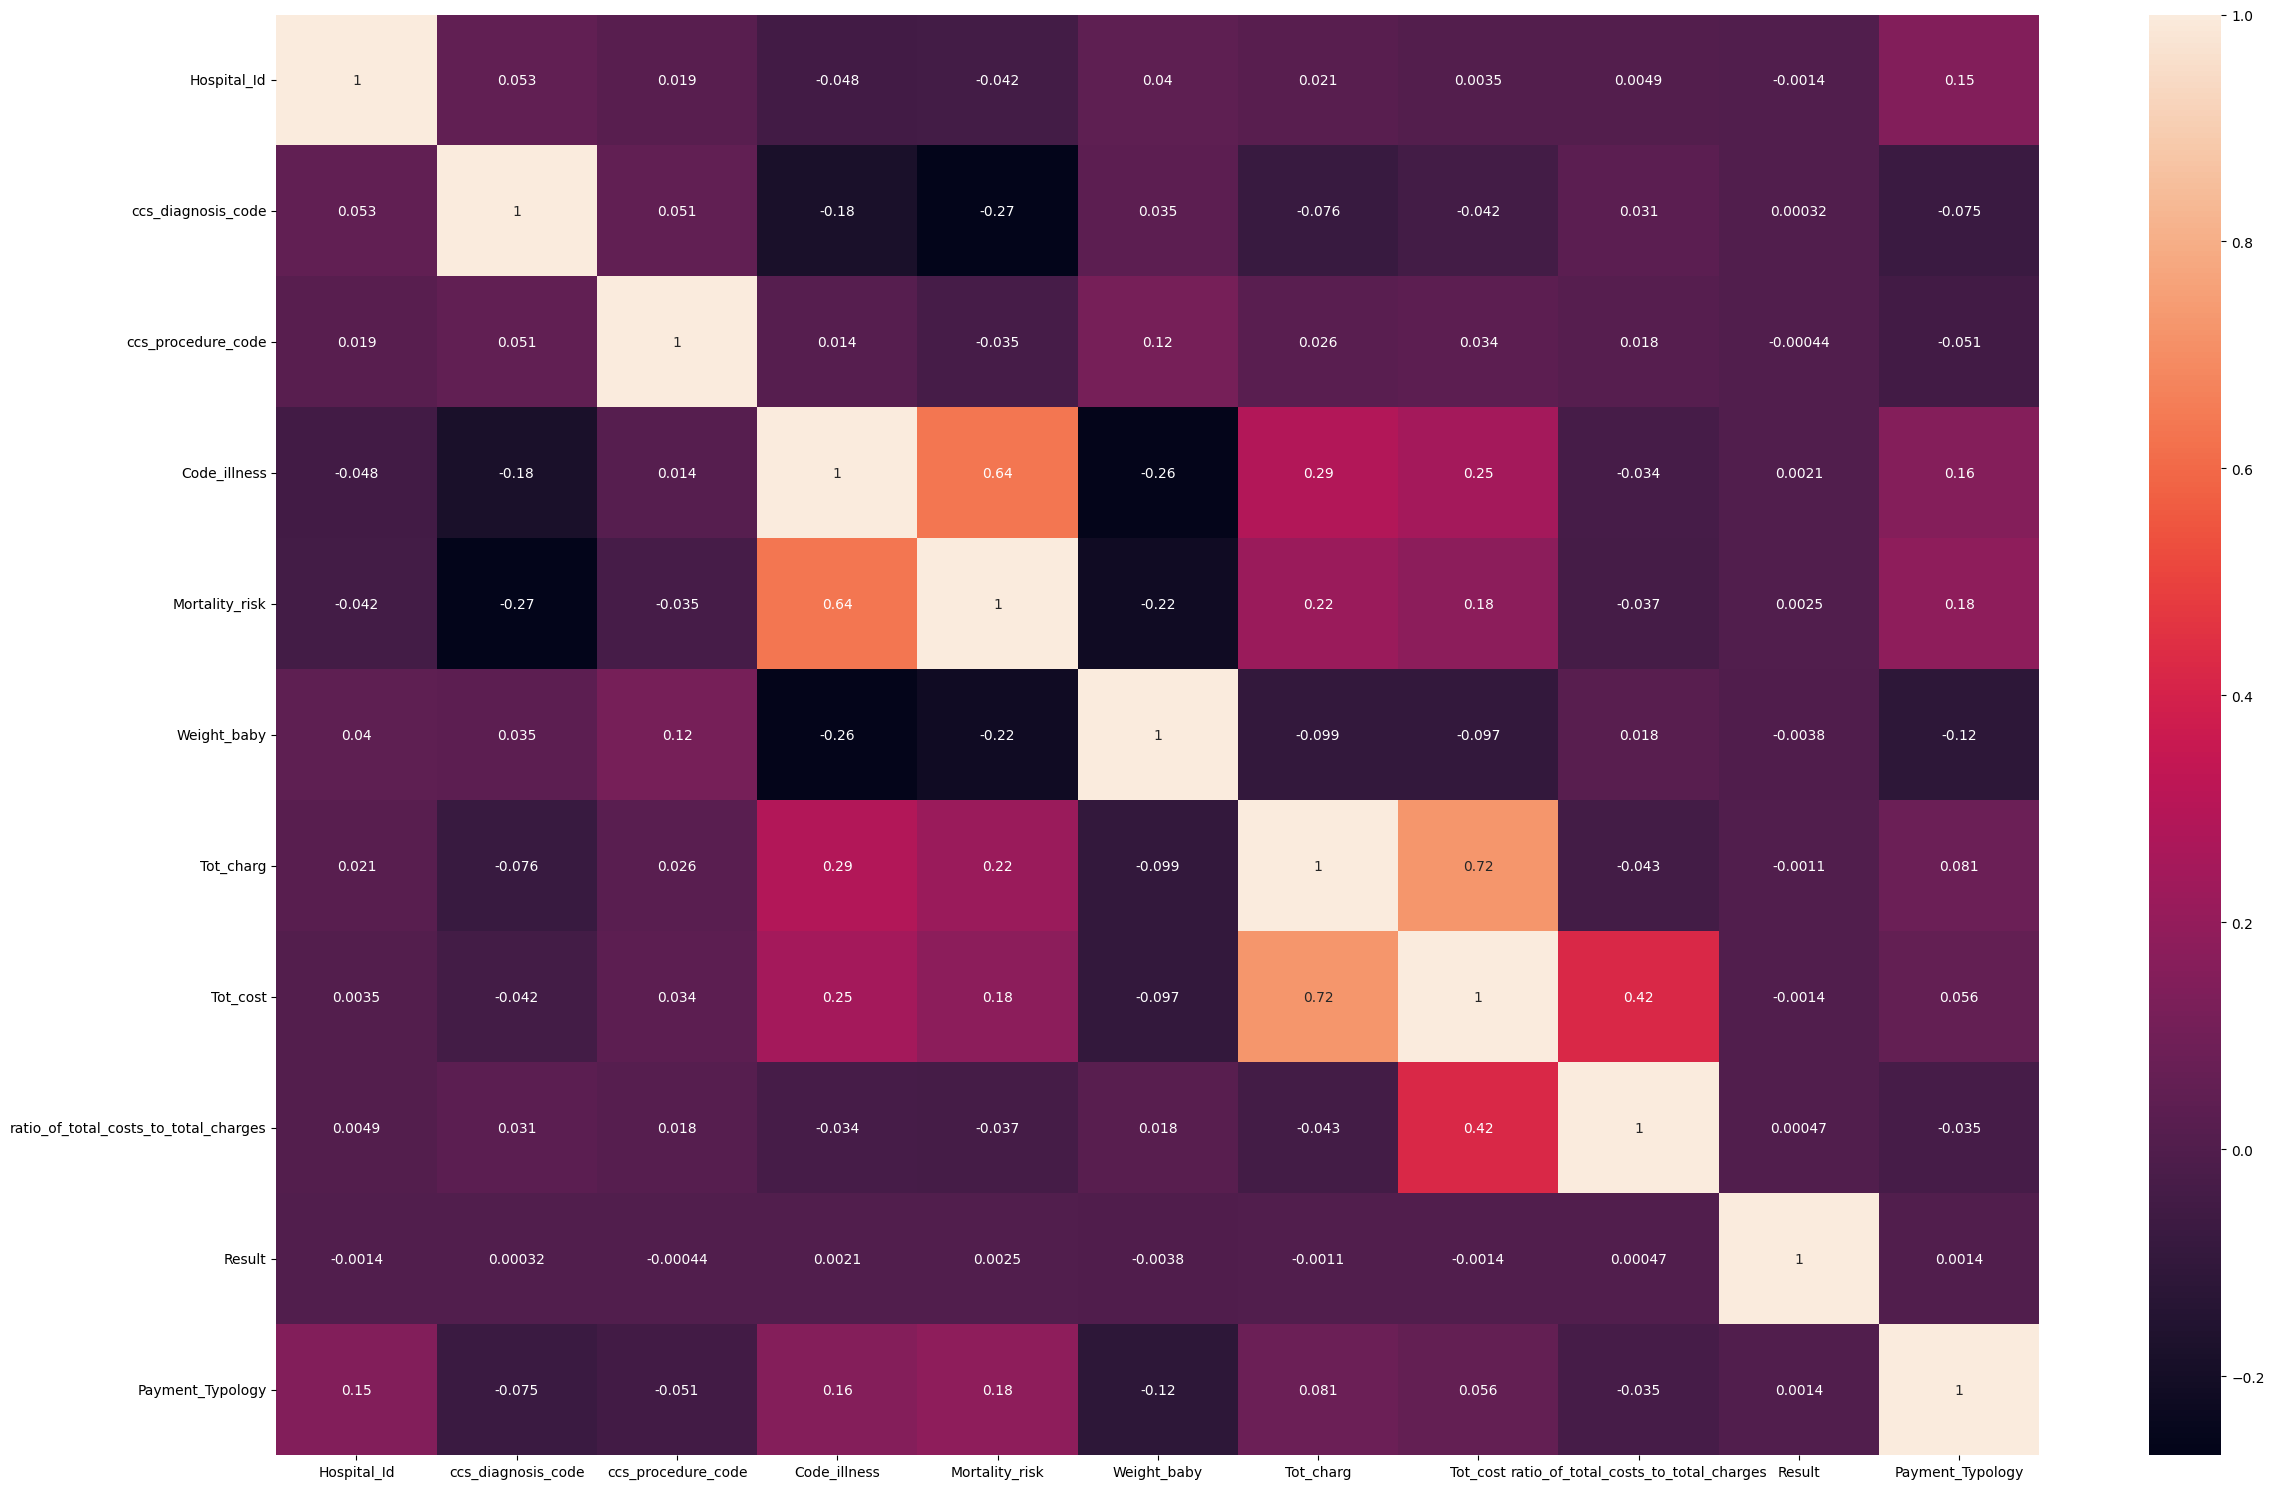

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

**Geographical & Demographic Analysis**

In [ ]:
df['Area_Service'].value_counts()

Hudson Valley      260070
Western NY         179370
Central NY         170223
Capital/Adirond    170054
Finger Lakes       155504
New York City       74307
Southern Tier       31737
Name: Area_Service, dtype: int64

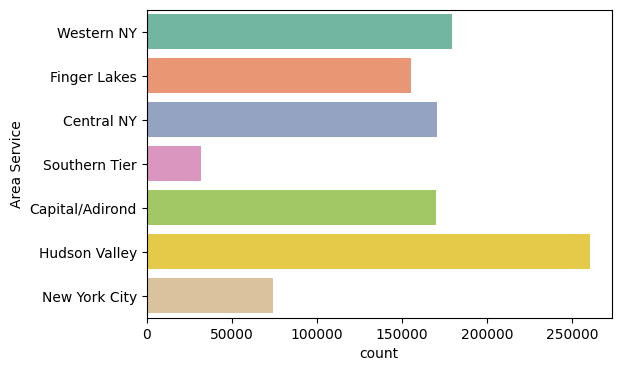

In [ ]:
# Area Service Analysis
plt.figure(figsize=(6,4))
sns.countplot(y='Area_Service',data=df, palette='Set2')
plt.ylabel('Area Service')
plt.show()

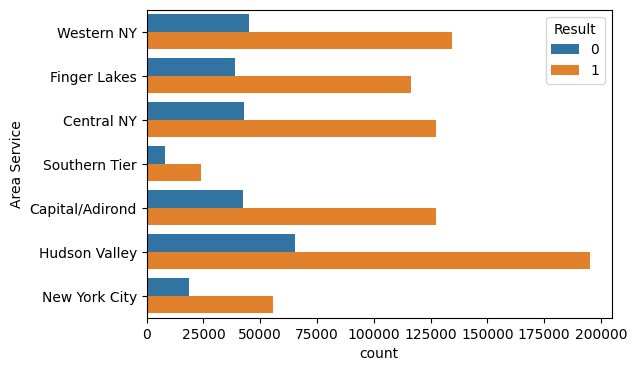

In [ ]:
# Relation between the Area Service and the number of fraudulent and non-fraudulent cases
plt.figure(figsize=(6,4))
sns.countplot(y='Area_Service',data=df, hue='Result')
plt.ylabel('Area Service')
plt.show()

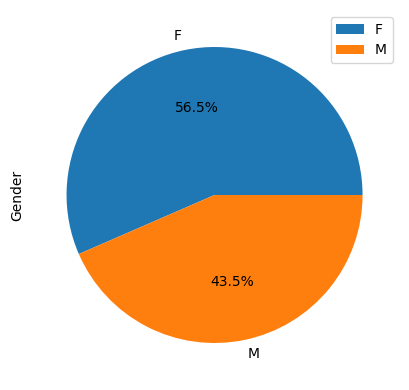

In [ ]:
# Genderwise Distribution
plt.figure(figsize=(6,4))
df['Gender'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.legend()
plt.show()

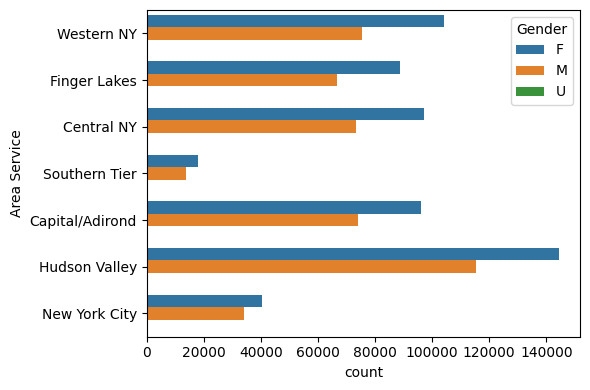

In [ ]:
# Relation between the Area Service and Gender
plt.figure(figsize=(6,4))
sns.countplot(y='Area_Service',data=df, hue='Gender')
plt.ylabel('Area Service')
plt.show()

In [ ]:
female = df[df['Gender']=='F']
print(female['Result'].value_counts(normalize=True)*100)

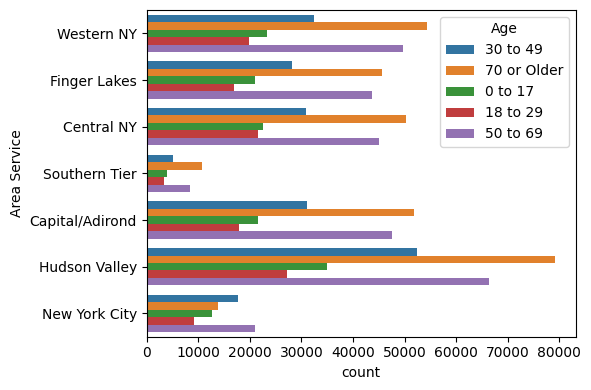

In [ ]:
# Relation between the Area Service and Age
plt.figure(figsize=(6,4))
sns.countplot(y='Area_Service',data=df, hue='Age')
plt.ylabel('Area Service')
plt.show()

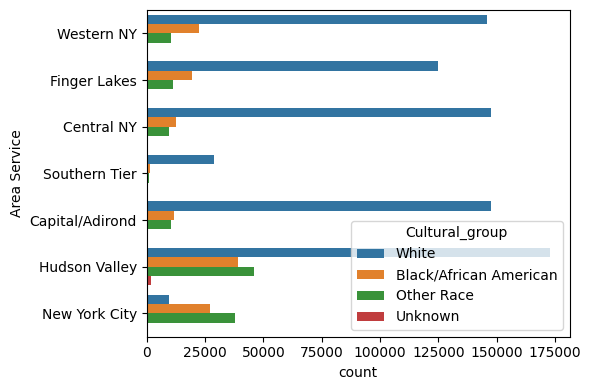

In [ ]:
# Relation between the Area Service and the Cultural group
plt.figure(figsize=(6,4))
sns.countplot(y='Area_Service',data=df, hue='Cultural_group')
plt.ylabel('Area Service')
plt.show()

1. Hudson Valley is the area of service having most number of cases, overall all area of services have 75% insurance frauds.
2. In most of the areas, females have been targeted.
3. People in their early 50s to late 70s have been targeted.
4. A lot of Whites are present in each Area of service


In [ ]:
df['Hospital_County'].value_counts()

Erie           128255
Westchester    126622
Monroe         110066
Onondaga        80432
Bronx           74307
Albany          61542
Orange          39665
Rockland        35344
Oneida          34080
Dutchess        32141
Broome          29742
Schenectady     23069
Niagara         21064
Chemung         16667
Warren          15459
Rensselaer      13857
Ulster          13606
Otsego          13206
Chautauqua      12757
St Lawrence     12269
Ontario         11987
Jefferson       11923
Clinton          9919
Saratoga         8923
Steuben          8798
Putnam           7005
Tompkins         6953
Montgomery       6454
Columbia         6315
Oswego           6103
Franklin         5870
Cattaraugus      5749
Sullivan         5687
Cayuga           5685
Madison          5091
Genesee          4954
Cortland         4849
Wayne            4134
Fulton           3507
Wyoming          2419
Livingston       2105
Orleans          2102
Allegany         2070
Chenango         1995
Lewis            1917
Delaware  

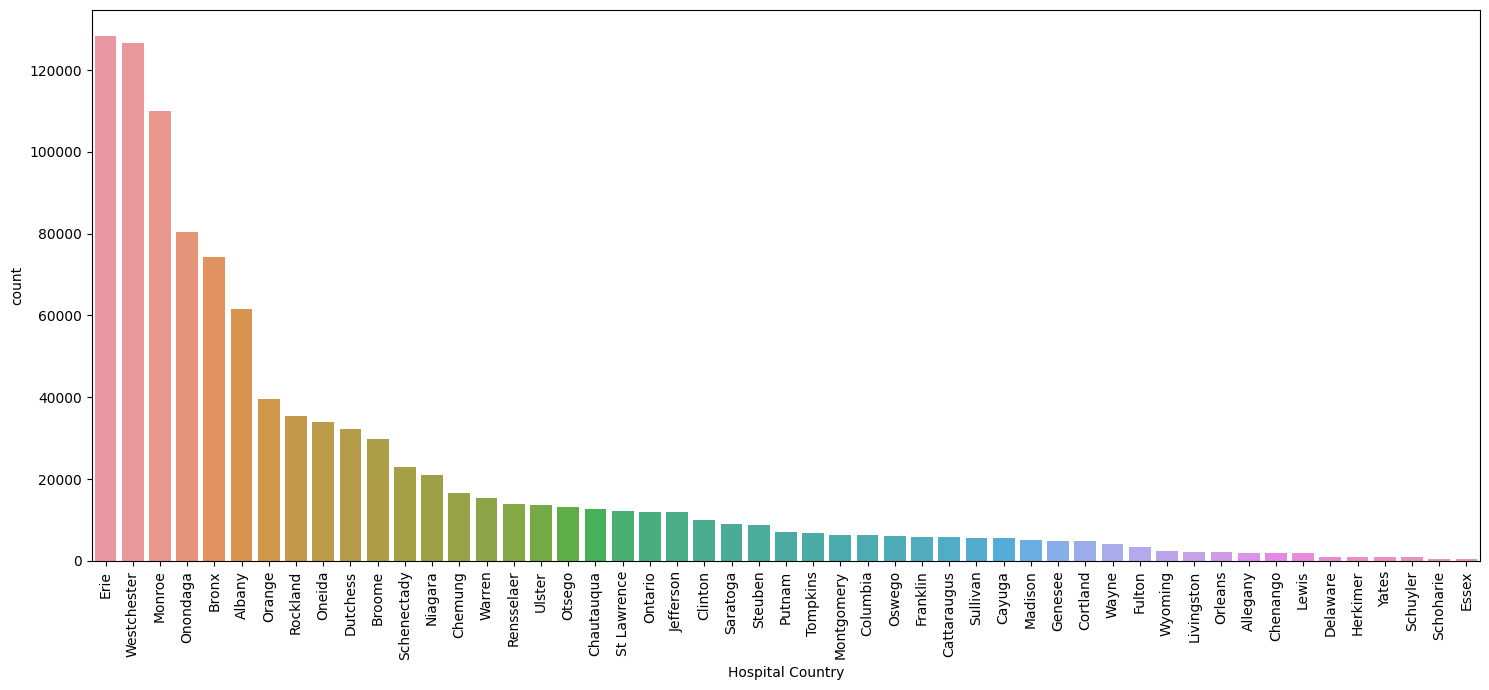

In [ ]:
# Number of cases in each hospital country
plt.figure(figsize=(15,7))
country = df['Hospital_County'].value_counts().reset_index()
country.columns = ['Hospital_County','count']
sns.barplot(x='Hospital_County', y ='count', data=country)
plt.xlabel('Hospital Country')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
country = df[df['Hospital_County']=='Essex']
print(country['Result'].value_counts(normalize=True)*100)

,Area_Service,Hospital_County,Hospital_Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home_or_self_care,",...,Mortality_risk,Surg_Description,Weight_baby,Abortion,Emergency_dept_yes_No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
620184,Capital/Adirond,Essex,303.0,70 or Older,F,White,Unknown,4,Emergency,Hosp Basd Medicare Approved Swing Bed,...,3.0,Medical,0,N,N,8645.46,9412.87,1.088765,1,1
620185,Capital/Adirond,Essex,303.0,70 or Older,M,White,Unknown,3,Emergency,Hosp Basd Medicare Approved Swing Bed,...,2.0,Medical,0,N,N,7610.56,8090.70,1.063089,1,1
620186,Capital/Adirond,Essex,303.0,70 or Older,F,White,Unknown,4,Emergency,Hosp Basd Medicare Approved Swing Bed,...,2.0,Medical,0,N,N,11833.30,12185.12,1.029731,0,1
620187,Capital/Adirond,Essex,303.0,70 or Older,F,White,Unknown,4,Emergency,Hosp Basd Medicare Approved Swing Bed,...,3.0,Medical,0,N,Y,9269.65,10441.97,1.126469,0,1
620188,Capital/Adirond,Essex,303.0,70 or Older,M,White,Unknown,3,Emergency,Hosp Basd Medicare Approved Swing Bed,...,2.0,Medical,0,N,Y,16093.45,11754.76,0.730406,0,1


Erie and Westchester are the two countries with 75% insurance frauds, while Essex is the country having minimum cases, but still accounts for 71% insurance fraud cases.

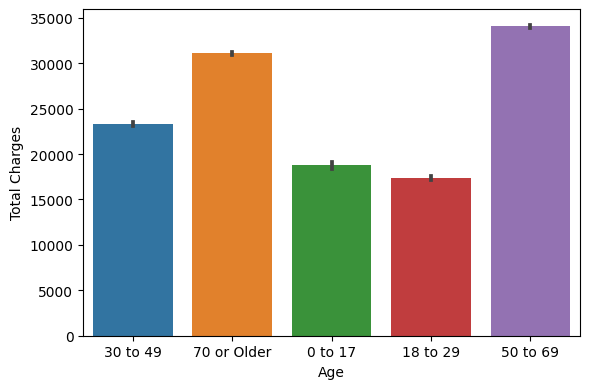

In [ ]:
# How is age related to the total charge
plt.figure(figsize=(6,4))
sns.barplot(x='Age',y='Tot_charg',data=df)
plt.ylabel('Total Charges')
plt.show()

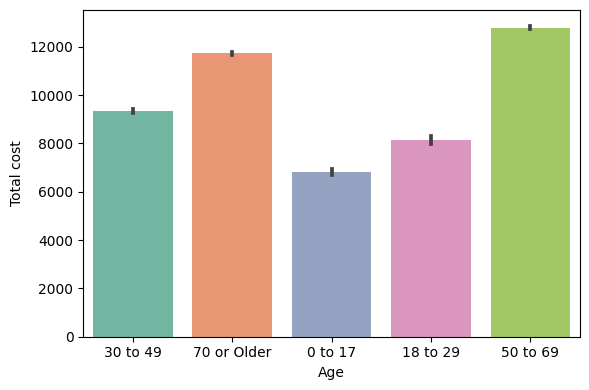

In [ ]:
# How is age related to the total cost
plt.figure(figsize=(6,4))
sns.barplot(x='Age',y='Tot_cost',data=df, palette='Set2')
plt.ylabel('Total cost')
plt.show()

As we can see from the given plots above, the trend between age and total cost,charges is increasing

In [ ]:
age = df['Age'].value_counts()
age

70 or Older    305802
50 to 69       281714
30 to 49       197730
0 to 17        140040
18 to 29       115979
Name: Age, dtype: int64

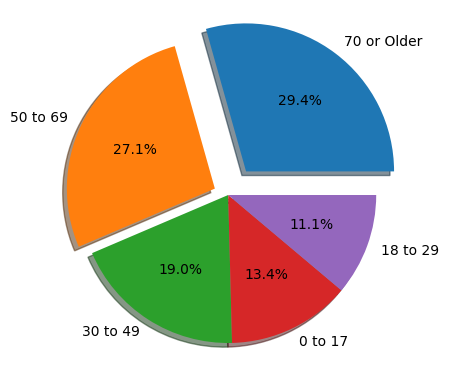

In [ ]:
# Agewise Distribution
plt.figure(figsize=(6,4))
plt.pie(age, labels= ['70 or Older','50 to 69','30 to 49','0 to 17','18 to 29'], shadow=True, autopct = '%1.1f%%', explode=[0.2,0.1,0,0,0])
plt.show()

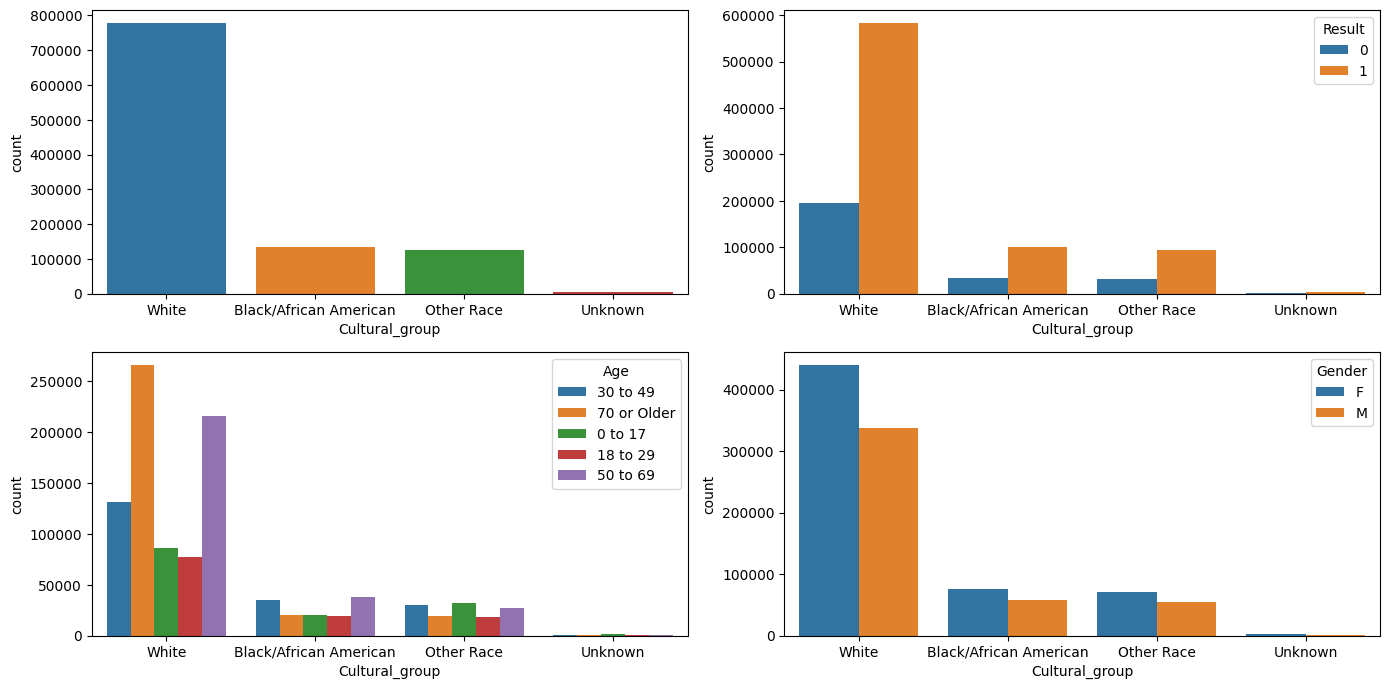

In [ ]:
# Relation of Cultural group with Age, Gender and the Result
plt.rcParams['figure.figsize']=[14,7]
plt.rcParams['figure.autolayout'] = True
f,axes = plt.subplots(2,2)
sns.countplot(x='Cultural_group',data=df,ax=axes[0][0])
sns.countplot(x='Cultural_group',data=df, hue='Result',ax=axes[0][1])
sns.countplot(x='Cultural_group',data=df, hue='Age',ax=axes[1][0])
sns.countplot(x='Cultural_group',data=df, hue='Gender',ax=axes[1][1])
plt.show()

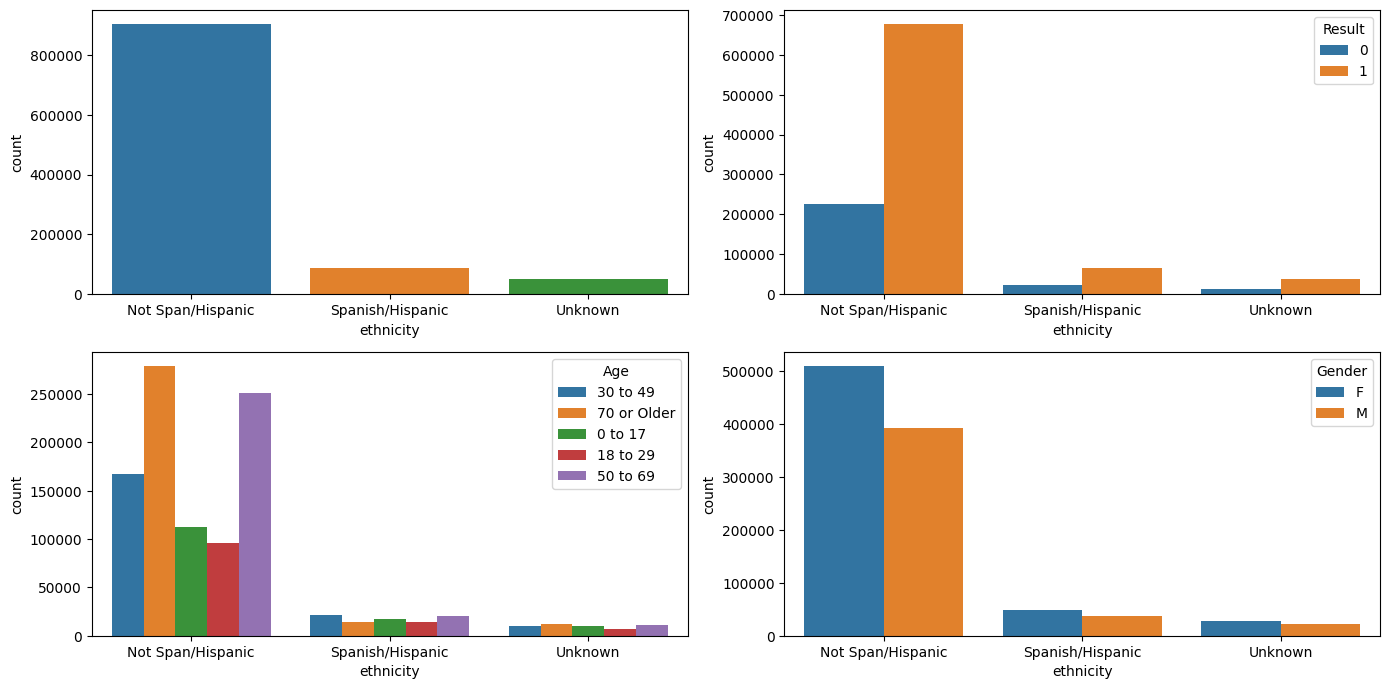

In [ ]:
# Relation of ethnicity with Age, Gender and the Result
plt.rcParams['figure.figsize']=[14,7]
plt.rcParams['figure.autolayout'] = True
f,axes = plt.subplots(2,2)
sns.countplot(x='ethnicity',data=df,ax=axes[0][0])
sns.countplot(x='ethnicity',data=df, hue='Result',ax=axes[0][1])
sns.countplot(x='ethnicity',data=df, hue='Age',ax=axes[1][0])
sns.countplot(x='ethnicity',data=df, hue='Gender',ax=axes[1][1])
plt.show()

In [ ]:
# Creating a copy of the orginal data
df1 = df.copy()
# Considering the geographic and demographic factors
df1 = df1.iloc[:,:7]
# Dropping this column since it is of no use
df1.drop(['Hospital_Id'],axis=1,inplace=True)

In [ ]:
df1.head()

,Area_Service,Hospital_County,Age,Gender,Cultural_group,ethnicity
0,Western NY,Allegany,30 to 49,F,White,Not Span/Hispanic
1,Western NY,Allegany,70 or Older,F,White,Not Span/Hispanic
2,Western NY,Allegany,30 to 49,F,White,Not Span/Hispanic
3,Western NY,Allegany,0 to 17,F,White,Not Span/Hispanic
4,Western NY,Allegany,70 or Older,F,White,Not Span/Hispanic


In [ ]:
# Applying label encoder to all the columns to convert them from categorical to numeric
df1 = df1.apply(LabelEncoder().fit_transform)
df1.head()

,Area_Service,Hospital_County,Age,Gender,Cultural_group,ethnicity
0,6,1,2,0,3,0
1,6,1,4,0,3,0
2,6,1,2,0,3,0
3,6,1,0,0,3,0
4,6,1,4,0,3,0


In [ ]:
# Principal Component Analysis
pca = PCA()
principal_components = pca.fit_transform(df1)
pca_df = pd.DataFrame(data=principal_components, columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6'])
pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
0,-22.934221,2.592784,0.006737,-1.064142,-0.423110,-0.109742
1,-22.929465,2.563055,-1.862010,-0.355049,-0.434834,-0.047093
2,-22.934221,2.592784,0.006737,-1.064142,-0.423110,-0.109742
3,-22.938977,2.622513,1.875485,-1.773236,-0.411387,-0.172390
4,-22.929465,2.563055,-1.862010,-0.355049,-0.434834,-0.047093


In [ ]:
pca_df[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6']].std()

PCA1    15.261251
PCA2     1.938124
PCA3     1.405068
PCA4     1.057134
PCA5     0.495706
PCA6     0.483133
dtype: float64

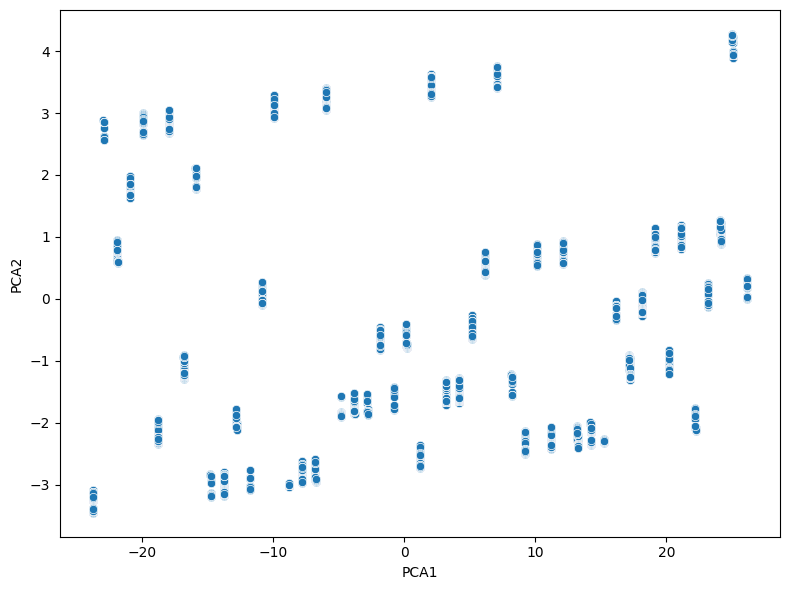

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1',y='PCA2',data=pca_df,palette='deep')
plt.show()

**Segment extraction using KMeans Clustering**

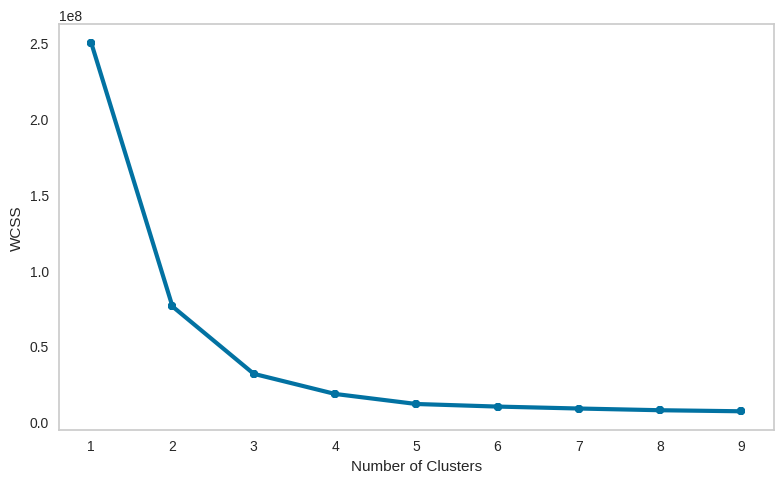

In [ ]:
# Using elbow method
wcss=[]
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=10)
  kmeans.fit(df1)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.grid()
plt.plot(range(1,10),wcss, marker = '8',linewidth='3')
plt.xlabel(range(1,10))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

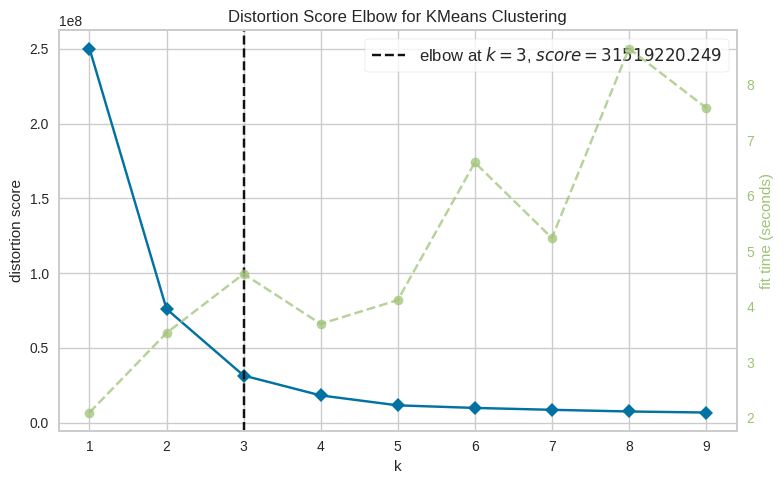

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Using KElbow Visualizer
plt.figure(figsize=(8,5))
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(df1)
visualizer.show()

It appears that there is an elbow at k = 3 clusters

In [ ]:
k_means_model = KMeans(3)
k_means_model.fit_predict(df1)
pca_df_kmeans = pd.concat([pca_df,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)
pca_df_kmeans.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,cluster
0,-22.934221,2.592784,0.006737,-1.064142,-0.423110,-0.109742,1
1,-22.929465,2.563055,-1.862010,-0.355049,-0.434834,-0.047093,1
2,-22.934221,2.592784,0.006737,-1.064142,-0.423110,-0.109742,1
3,-22.938977,2.622513,1.875485,-1.773236,-0.411387,-0.172390,1
4,-22.929465,2.563055,-1.862010,-0.355049,-0.434834,-0.047093,1


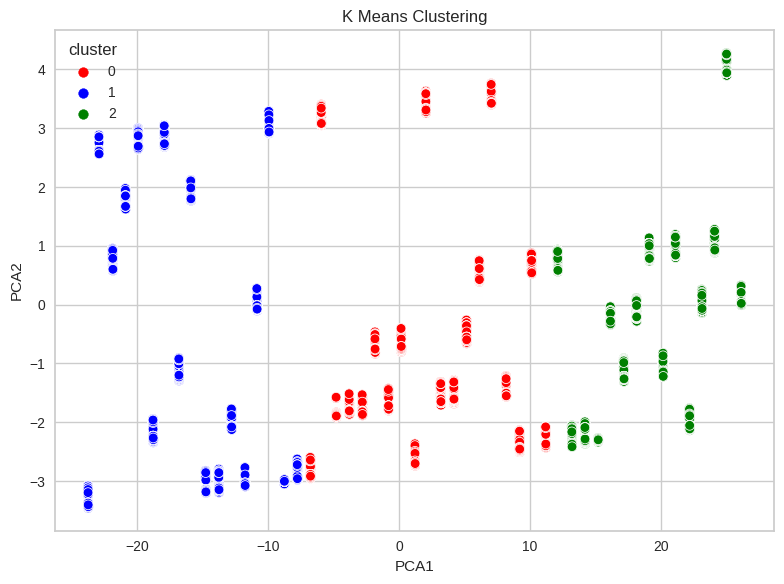

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x='PCA1',y='PCA2',hue='cluster',data=pca_df_kmeans,palette=['red','blue','green'])
plt.title('K Means Clustering')
plt.show()

In [ ]:
k_means_model = KMeans(3)
k_means_model.fit_predict(df1)
pca_df_kmeans1 = pd.concat([df,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)
pca_df_kmeans1.head()

,Area_Service,Hospital_County,Hospital_Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home_or_self_care,",...,Surg_Description,Weight_baby,Abortion,Emergency_dept_yes_No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology,cluster
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,...,Medical,0.0,N,Y,5511.95,5582.49,1.012798,1.0,1.0,2.0
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,...,Medical,0.0,N,Y,4783.20,5162.82,1.079365,1.0,1.0,2.0
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,...,Medical,0.0,N,Y,3829.15,4056.52,1.059379,1.0,1.0,2.0
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,...,Medical,0.0,N,Y,1108.20,1644.75,1.484167,0.0,1.0,2.0
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,...,Medical,0.0,N,Y,3418.18,3370.87,0.986161,1.0,1.0,2.0


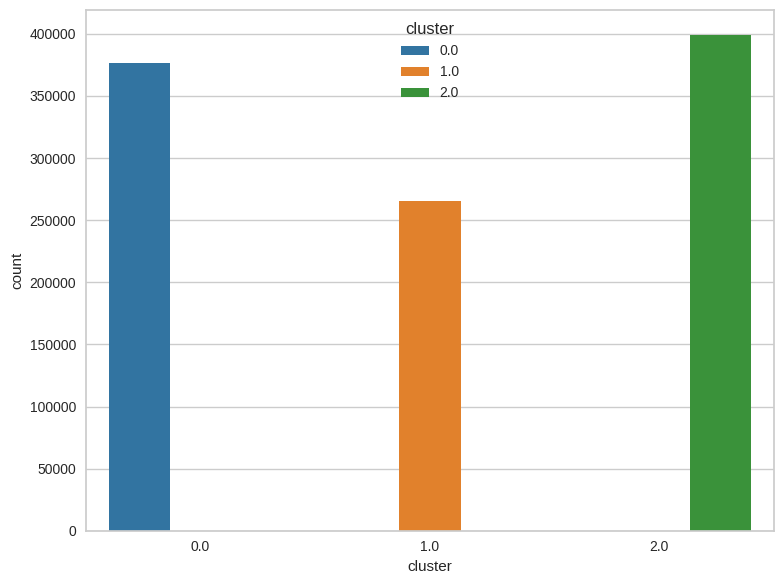

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='cluster',data=pca_df_kmeans1, hue='cluster', palette='tab10')
plt.show()

In [ ]:
pca_df_kmeans1['cluster'].value_counts(normalize=True)*100

2.0    38.345700
0.0    36.153022
1.0    25.501278
Name: cluster, dtype: float64

**Profiling & Describing Segments**

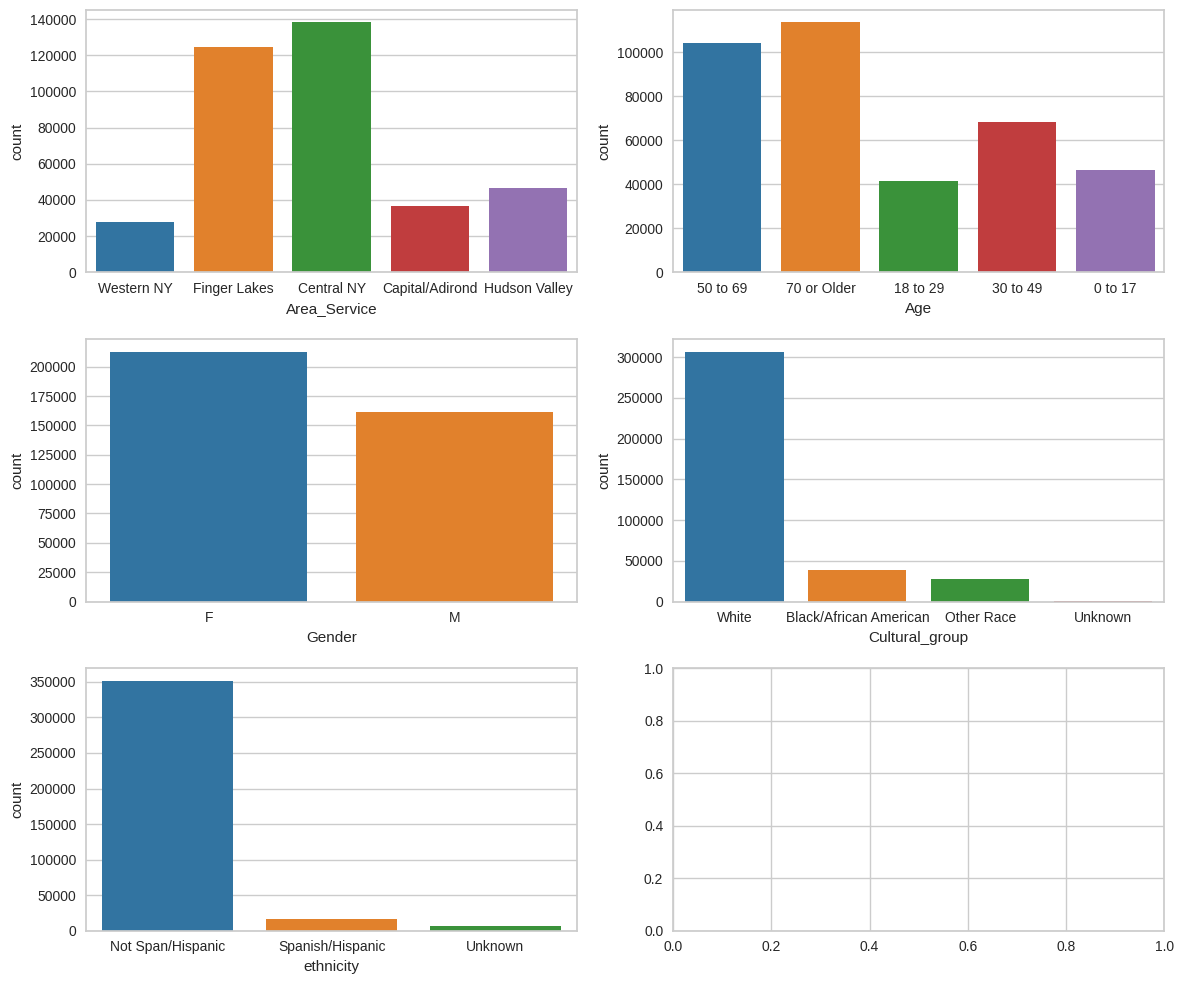

In [ ]:
# Analysis of Cluster 1
plt.rcParams['figure.figsize'] = [12,10]
plt.rcParams['figure.autolayout'] = True
f,axes = plt.subplots(3,2)
sns.countplot(x='Area_Service',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax = axes[0][0], palette='tab10')
sns.countplot(x='Age',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax = axes[0][1], palette='tab10')
sns.countplot(x='Gender',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax = axes[1][0], palette='tab10')
sns.countplot(x='Cultural_group',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax = axes[1][1], palette='tab10')
sns.countplot(x='ethnicity',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0],ax = axes[2][0], palette='tab10')
plt.show()

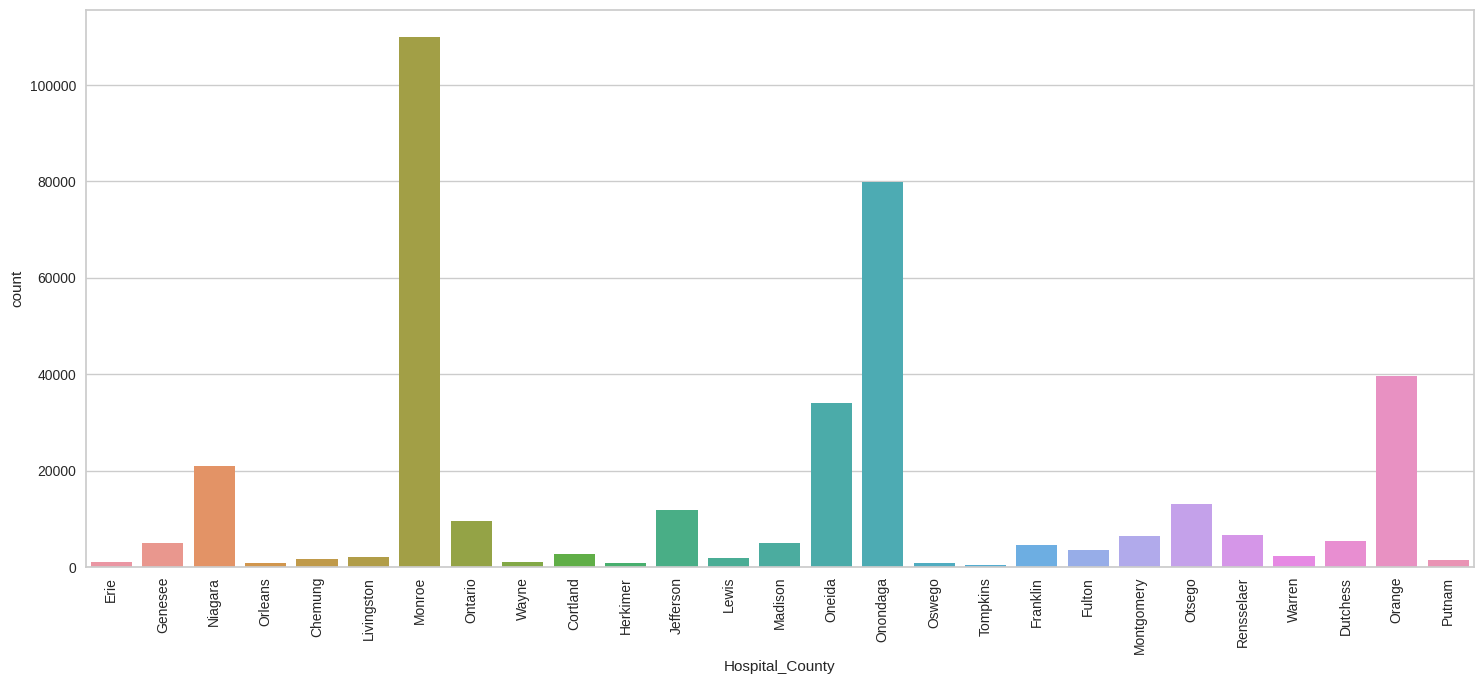

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x='Hospital_County',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 0])
plt.xticks(rotation=90)
plt.show()

This cluster contains the most number of cases in Monroe, in the area of service of Central NY. People in their early 50 to late 70s, who are Females, Whites and Non span/hispanic are targeted for such frauds.

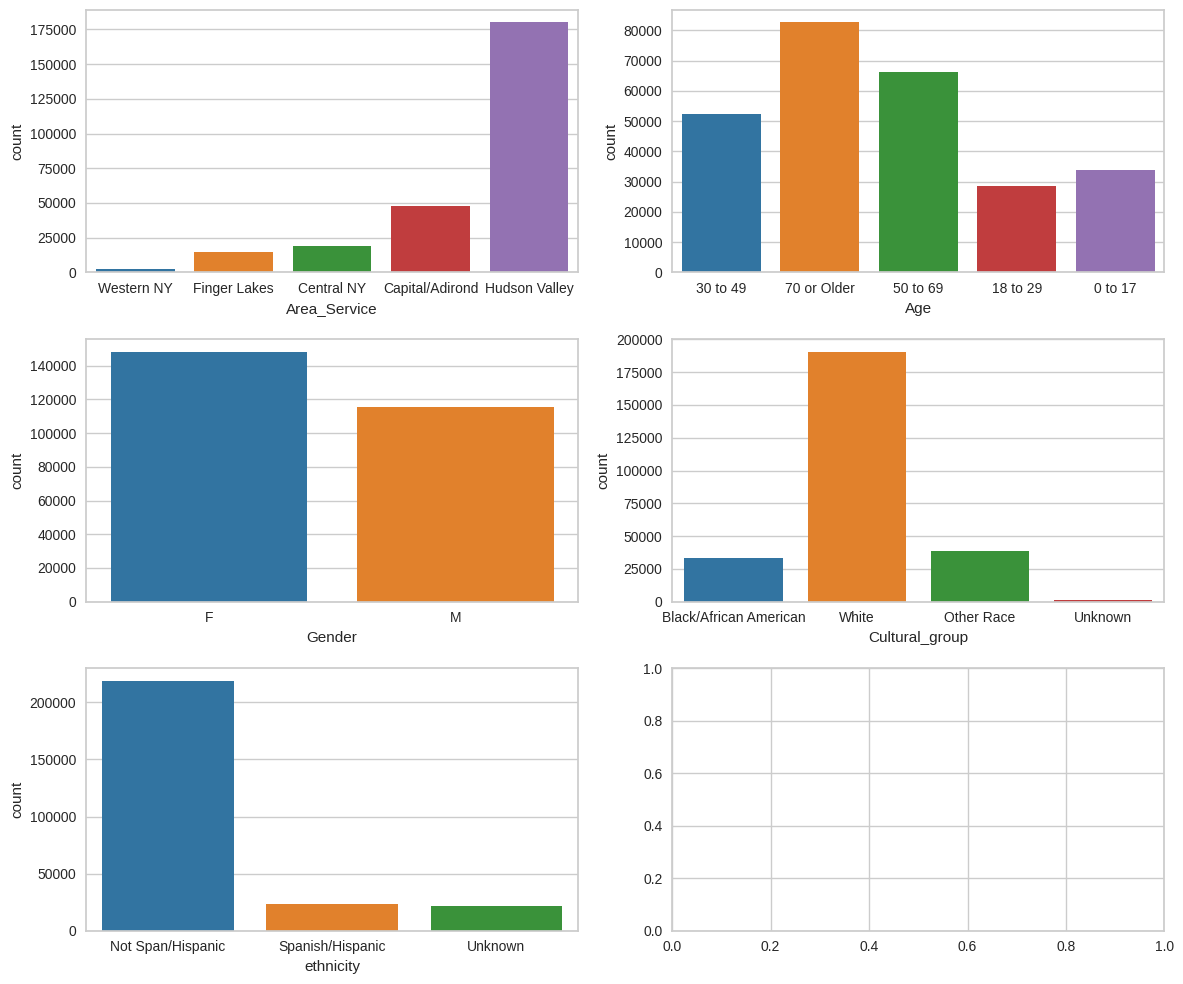

In [ ]:
# Analysis of Cluster 2
plt.rcParams['figure.figsize'] = [12,10]
plt.rcParams['figure.autolayout'] = True
f,axes = plt.subplots(3,2)
sns.countplot(x='Area_Service',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax = axes[0][0], palette='tab10')
sns.countplot(x='Age',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax = axes[0][1], palette='tab10')
sns.countplot(x='Gender',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax = axes[1][0], palette='tab10')
sns.countplot(x='Cultural_group',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax = axes[1][1], palette='tab10')
sns.countplot(x='ethnicity',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1],ax = axes[2][0], palette='tab10')
plt.show()

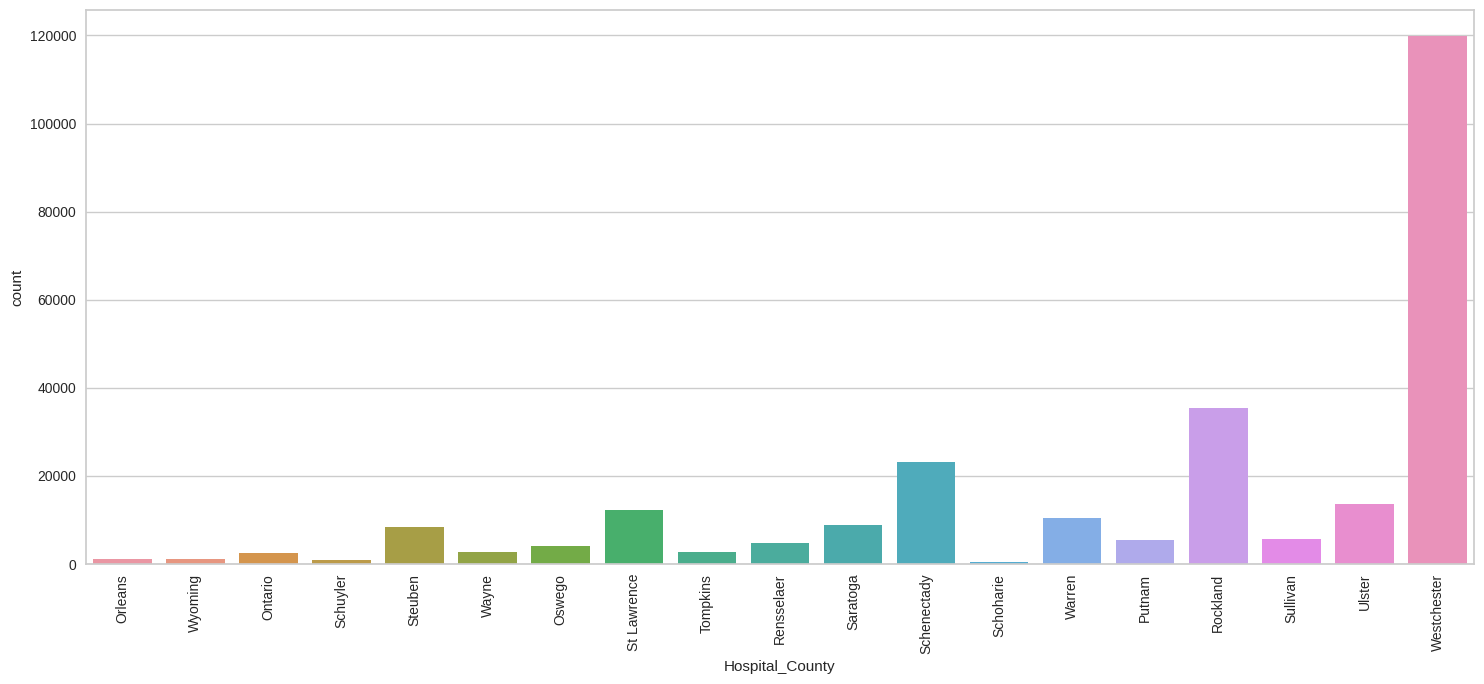

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x='Hospital_County',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 1])
plt.xticks(rotation=90)
plt.show()

This cluster contains the most number of cases in Westchester, in the area of service of Hudson Valley. People in their early 50 to late 70s, who are Females, Whites and Non span/hispanic are targeted for such frauds.

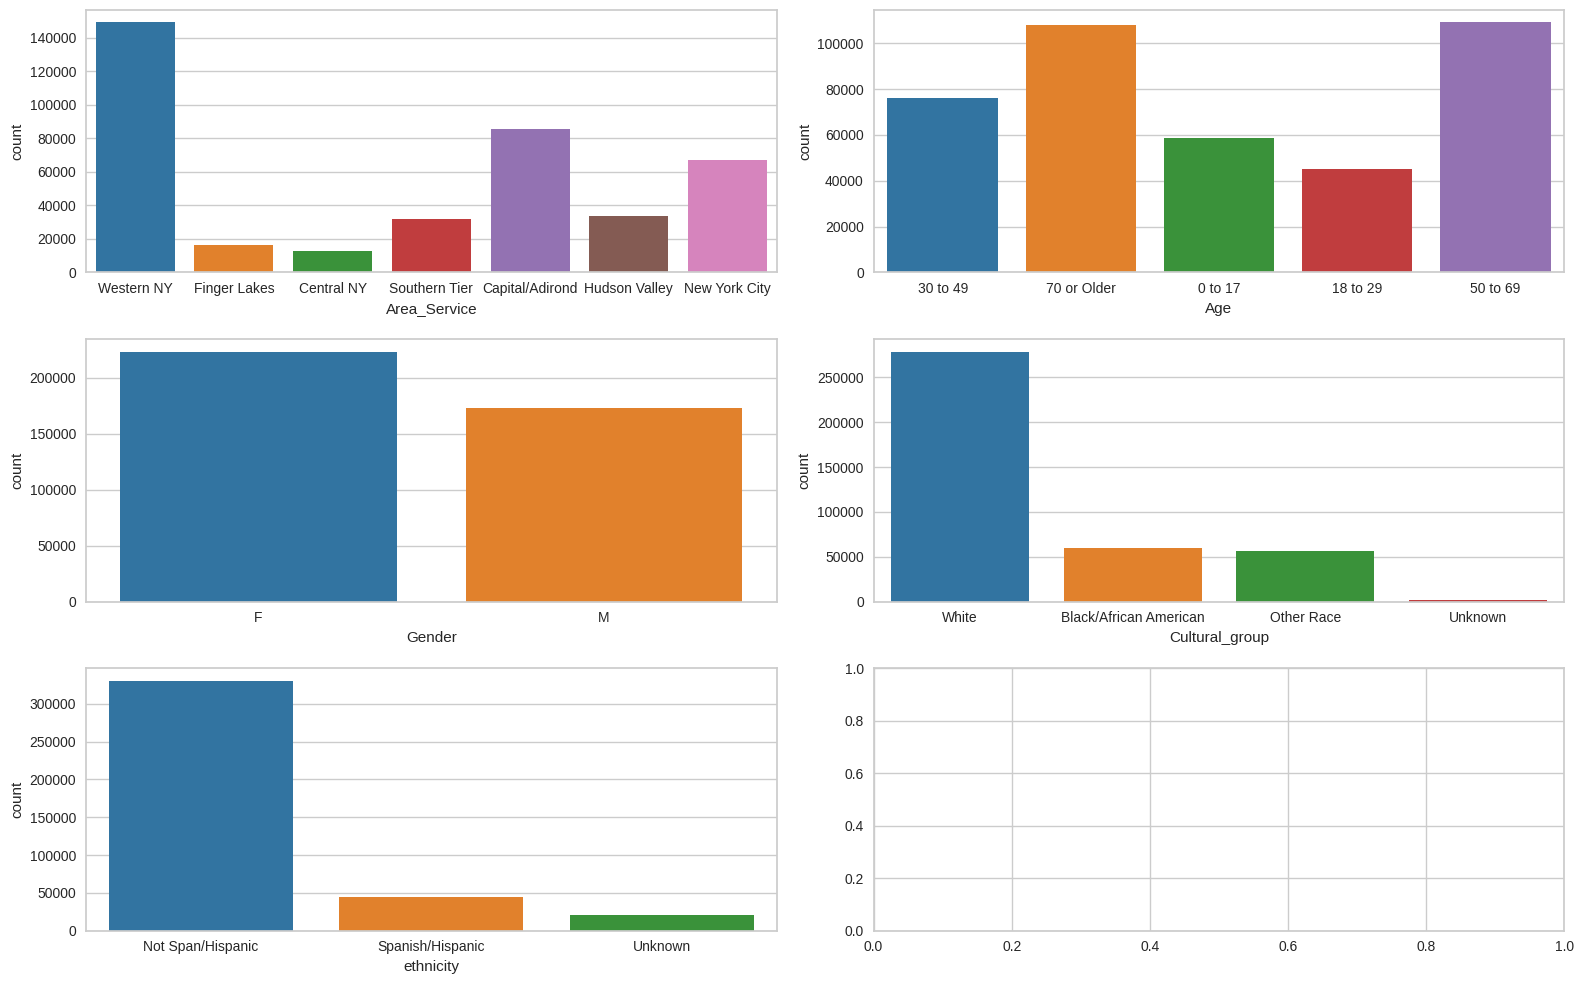

In [ ]:
# Analysis of Cluster 3
plt.rcParams['figure.figsize'] = [16,10]
plt.rcParams['figure.autolayout'] = True
f,axes = plt.subplots(3,2)
sns.countplot(x='Area_Service',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax = axes[0][0], palette='tab10')
sns.countplot(x='Age',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax = axes[0][1], palette='tab10')
sns.countplot(x='Gender',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax = axes[1][0], palette='tab10')
sns.countplot(x='Cultural_group',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax = axes[1][1], palette='tab10')
sns.countplot(x='ethnicity',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2],ax = axes[2][0], palette='tab10')
plt.show()

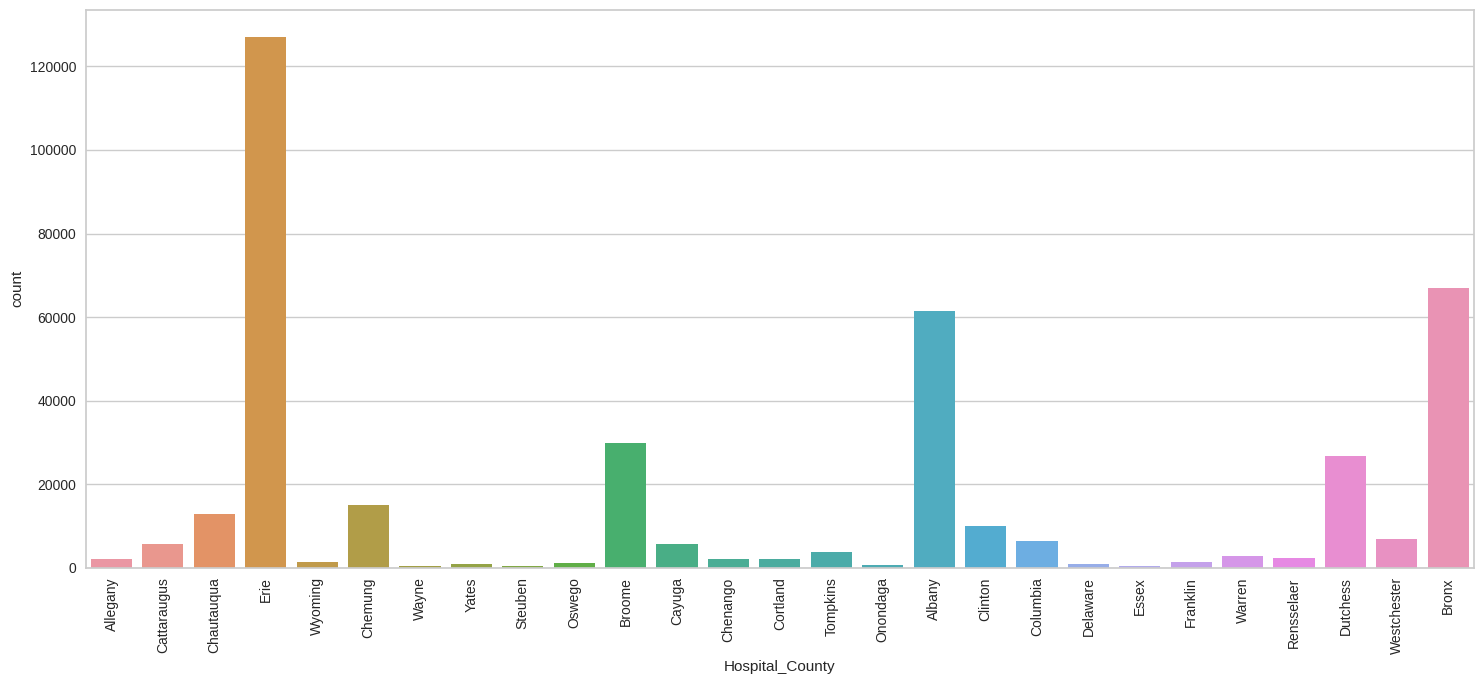

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x='Hospital_County',data =pca_df_kmeans1[pca_df_kmeans1['cluster'] == 2])
plt.xticks(rotation=90)
plt.show()

This cluster contains the most number of cases in Erie, in the area of service of Western NY. People in their early 50 to late 70s, who are Females, Whites and Non span/hispanic are targeted for such frauds.